In [300]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [301]:
a = 'XY_bal_log_Rel.txt'
cols = ['E_peak', 'beta', 'sigma', 'beta_Rel', '0,1=astro,DM']

In [302]:
# Leer el título del archivo
title = pd.read_csv(a, nrows=0, usecols=[0])
title = title.columns.values[0]
print(title)

E_peak beta sigma beta_Rel 0


In [303]:
# Leer los datos del archivo
data = pd.read_csv(a, sep='\s+', names=cols, skiprows=1, header=None)
data.sample(5)

,E_peak,beta,sigma,beta_Rel,"0,1=astro,DM"
1157,-0.481921,-0.764219,1.222272,-0.410355,0.0
3846,0.086004,-0.325231,0.610767,-0.419015,1.0
2662,0.433210,-0.149293,0.711563,-0.314275,0.0
1724,1.580115,-0.877456,0.781533,-0.090731,0.0
2314,-0.297328,-0.544394,1.061999,-0.551432,0.0


In [304]:
data.describe()

,E_peak,beta,sigma,beta_Rel,"0,1=astro,DM"
count,5662.000000,5662.000000,5662.000000,5662.000000,5662.000000
mean,1.018241,-0.819062,1.061131,-0.061574,0.500000
std,1.667957,0.413740,0.357026,0.478845,0.500044
min,-5.912006,-2.602060,0.608098,-3.198657,0.000000
25%,-0.086760,-1.093827,0.778414,-0.301915,0.000000
50%,0.883369,-0.805070,0.973677,-0.045029,0.500000
75%,2.302818,-0.502967,1.254676,0.287035,1.000000
max,5.918502,0.000000,2.899104,1.866966,1.000000


In [ ]:
# Eliminate any strong dependencies or correlations between the variables
data = data.drop(['0,1=astro,DM'], axis=1)
data.corr()

,E_peak,beta,sigma,beta_Rel,"0,1=astro,DM"
E_peak,1.000000,0.108252,-0.116761,0.355409,0.662491
beta,0.108252,1.000000,-0.106935,-0.294714,0.280305
sigma,-0.116761,-0.106935,1.000000,-0.347368,-0.143709
beta_Rel,0.355409,-0.294714,-0.347368,1.000000,0.329702
"0,1=astro,DM",0.662491,0.280305,-0.143709,0.329702,1.000000


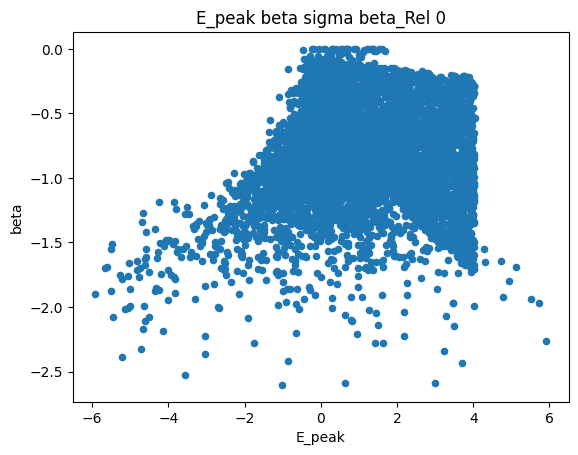

In [306]:
data.plot(x='E_peak', y='beta', kind='scatter', title=title)
plt.show()

In [307]:
cdf=data[['E_peak','beta', 'sigma', 'beta_Rel']]
cdf.sample(9)

,E_peak,beta,sigma,beta_Rel
2930,3.880756,-1.683401,0.721151,0.514310
418,0.987224,-1.401209,1.490305,-0.238955
4748,-0.044457,-0.634325,0.747334,-0.172829
761,0.305287,-1.094204,1.344298,-0.312510
855,1.371493,-1.082494,1.144503,-0.121625
4547,3.469233,-0.463820,1.634074,-0.084700
35,0.182586,-0.940815,1.307949,-0.405008
5133,3.997910,-0.896538,0.739414,0.596896
103,0.557495,-0.912574,1.369030,-0.432288


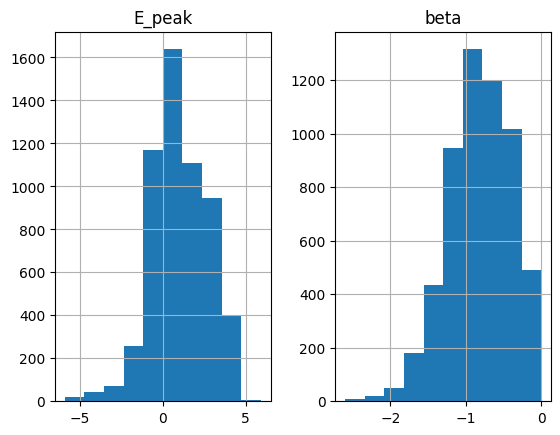

In [308]:
viz = cdf[['E_peak','beta']]
viz.hist()
plt.show()

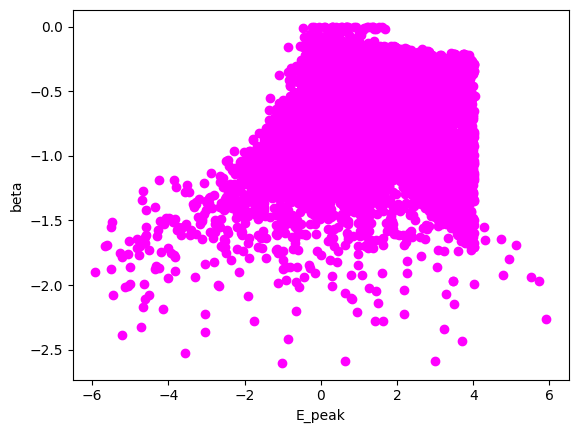

In [309]:
plt.scatter(cdf.E_peak, cdf.beta,  color='magenta')
plt.xlabel("E_peak")
plt.ylabel("beta")
plt.show()

In [310]:
# Extracción de variables de entrada y salida
X = cdf.E_peak.to_numpy()
Y = cdf.beta.to_numpy()


In [311]:
# División de los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [312]:
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (4529,), (4529,))

# Construcción del modelo simple de regresión lineal

In [313]:
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model on the training data
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# So we need to reshape it. We can let it infer the number of observations using '-1'.
regressor.fit(X_train.reshape(-1, 1), y_train)

# Print the coefficients
print ('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)

# Coefficient and Intercepet are the regression parameters that the model has learned from the training data.
# They define the slope and the intercept of the line that best fits the data.

Coefficients:  0.027522145984573424
Intercept:  -0.8445220308037715


# Visulize model outputs

Text(0, 0.5, 'beta')

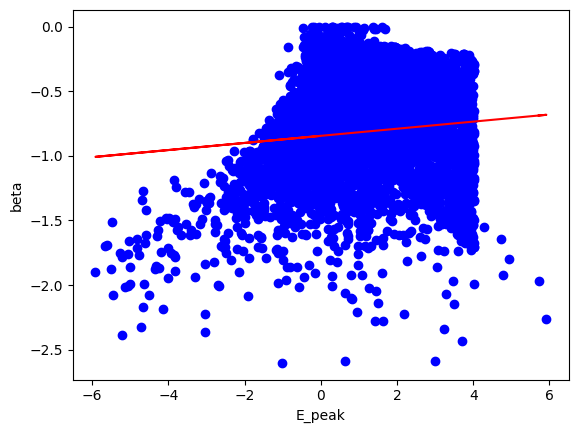

In [314]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("E_peak")
plt.ylabel("beta")

# Model Evaluation

In [315]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Use the predict method to make test predictions
y_test_ = regressor.predict( X_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test_, y_test))
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_test))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test_, y_test))
print("R2-score: %.2f" % r2_score( y_test_, y_test) )

Mean absolute error: 0.34
Mean squared error: 0.17
Root mean squared error: 0.42
R2-score: -79.93


## Plot the regression model result over the test data instead of the training data. Visually evaluate whether the result is good.

Text(0, 0.5, 'beta')

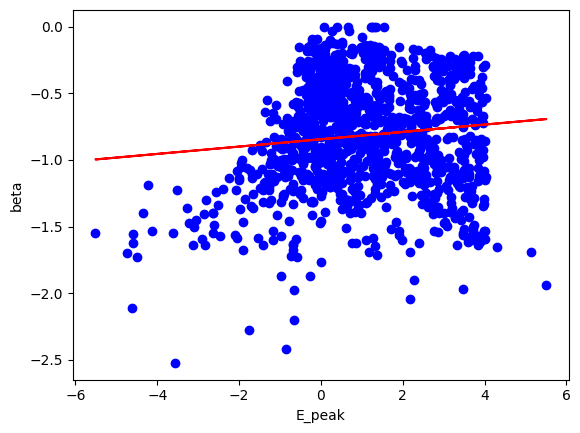

In [316]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, regressor.coef_ * X_test + regressor.intercept_, '-r')
plt.xlabel("E_peak")
plt.ylabel("beta")